# Ex. 1. Standard Neural Network

In [7]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import pathlib
import os

print("TensorFlow version:", tf.__version__)
AUTOTUNE = tf.data.experimental.AUTOTUNE

TensorFlow version: 2.2.0


### Ex 1.1.
### Add a layer (tf.keras.layers.Dense) with 32 neurons and sigmoid activation function directly before the layer with the name “output”. Show the code in your report.


In [11]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(64, activation="sigmoid", 
                              input_shape=(1,), 
                              name="hidden1"), 
    tf.keras.layers.Dense(32, activation="sigmoid", 
                              name="hidden2"), 
    tf.keras.layers.Dense(1, activation="linear", name="output")])

model.summary()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 64)                128       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


### Ex 1.2.
#### Rewrite the model (including the new layer) using the functional functional API. Show the code in your report.



In [12]:
inputs = tf.keras.Input(shape=(1,))
l1 = tf.keras.layers.Dense(64, activation="sigmoid",
                              name="hidden1")(inputs)
l2 = tf.keras.layers.Dense(32, activation="sigmoid",
                              name="hidden2")(l1)
output = tf.keras.layers.Dense(1, activation="linear",
                              name="output")(l2)

model = tf.keras.Model(inputs=inputs, outputs=output)

model.summary()
tf.keras.backend.clear_session()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 64)                128       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [0]:
tf.keras.backend.clear_session()

### Ex1.3. 
#### Add a shortcut connection from the input layer to the last layer. Report the number of trainable parameters of the resulting model. Show the code in your report.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 64)           128         input_1[0][0]                    
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 32)           2080        hidden1[0][0]                    
__________________________________________________________________________________________________
shortcut (Concatenate)          (None, 33)           0           input_1[0][0]                    
                                                                 hidden2[0][0]                

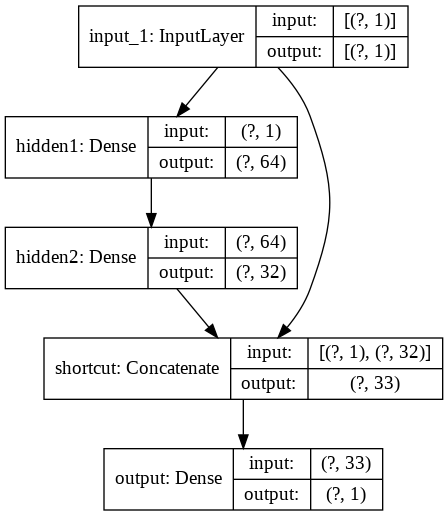

In [13]:
inputs = tf.keras.Input(shape=(1,))
l1 = tf.keras.layers.Dense(64, activation="sigmoid",
                              name="hidden1")(inputs)
l2 = tf.keras.layers.Dense(32, activation="sigmoid",
                              name="hidden2")(l1)
l3 = tf.keras.layers.concatenate([inputs, l2],
                                 name="shortcut")
output = tf.keras.layers.Dense(1, activation="linear",
                              name="output")(l3)

model = tf.keras.Model(inputs=inputs, outputs=output)

model.summary()
tf.keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

The total number of parameters is: 3296  
There are 128 parameters (weights and biases) in the first hidden layer, 2080 in the second hidden layer and 1088 in the output layer.